# Checkpoint 4 - Data Science

## Turma 2ESPW

### Nomes dos Alunos:
- **Guilherme Daher** - **RM:98611**
- **Gabriel Freitas** - **RM551897**
- **Gustavo Akio** - **RM:550241**


In [49]:
import pandas as pd

# Carregar o dataset da Netflix
netflix_data = pd.read_csv('netflix_titles.csv')

# Verificar as colunas disponíveis e as primeiras linhas do dataset
print("Colunas disponíveis no dataset Netflix:")
print(netflix_data.columns)
print()

print("Primeiras linhas do dataset Netflix:")
print(netflix_data.head())


Colunas disponíveis no dataset Netflix:
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Primeiras linhas do dataset Netflix:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jit

In [50]:
# Estatísticas descritivas das colunas
print("Estatísticas descritivas:")
print(netflix_data.describe(include='all'))
print()

# Verificar se há valores faltantes
print("Valores faltantes nas colunas:")
print(netflix_data.isnull().sum())


Estatísticas descritivas:
       show_id   type                 title       director  \
count     8807   8807                  8807           6173   
unique    8807      2                  8807           4528   
top         s1  Movie  Dick Johnson Is Dead  Rajiv Chilaka   
freq         1   6131                     1             19   
mean       NaN    NaN                   NaN            NaN   
std        NaN    NaN                   NaN            NaN   
min        NaN    NaN                   NaN            NaN   
25%        NaN    NaN                   NaN            NaN   
50%        NaN    NaN                   NaN            NaN   
75%        NaN    NaN                   NaN            NaN   
max        NaN    NaN                   NaN            NaN   

                      cast        country       date_added  release_year  \
count                 7982           7976             8797   8807.000000   
unique                7692            748             1767           NaN   
t

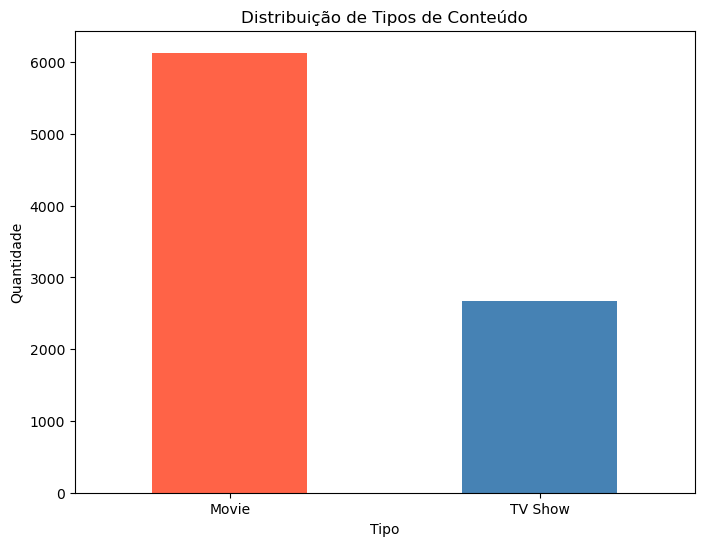

In [51]:
import matplotlib.pyplot as plt

# Distribuição dos tipos de conteúdo
type_counts = netflix_data['type'].value_counts()
plt.figure(figsize=(8, 6))
type_counts.plot(kind='bar', color=['#FF6347', '#4682B4'])
plt.title('Distribuição de Tipos de Conteúdo')
plt.xlabel('Tipo')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.show()


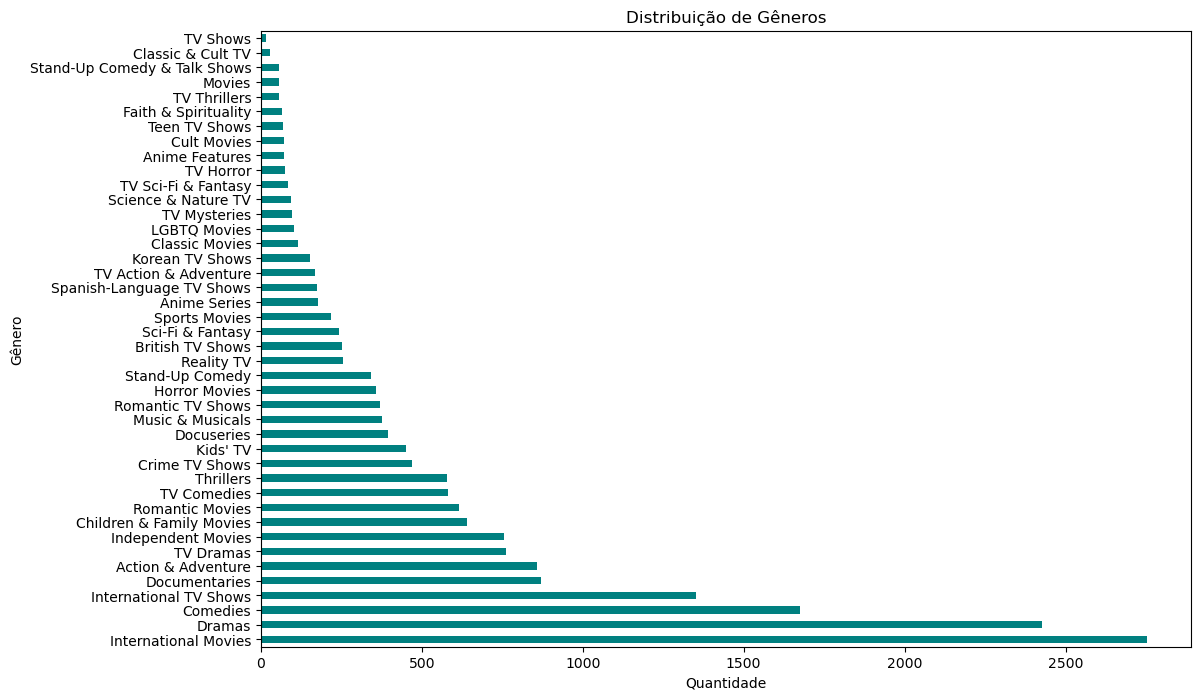

In [52]:
# Separar os gêneros múltiplos em listas
netflix_data['listed_in'] = netflix_data['listed_in'].fillna('')  # Substituir NaN por string vazia
netflix_data['listed_in'] = netflix_data['listed_in'].apply(lambda x: x.split(', '))

# Explodir os gêneros para análise
exploded_genres = netflix_data.explode('listed_in')
genre_counts = exploded_genres['listed_in'].value_counts()

plt.figure(figsize=(12, 8))
genre_counts.plot(kind='barh', color='teal')
plt.title('Distribuição de Gêneros')
plt.xlabel('Quantidade')
plt.ylabel('Gênero')
plt.show()


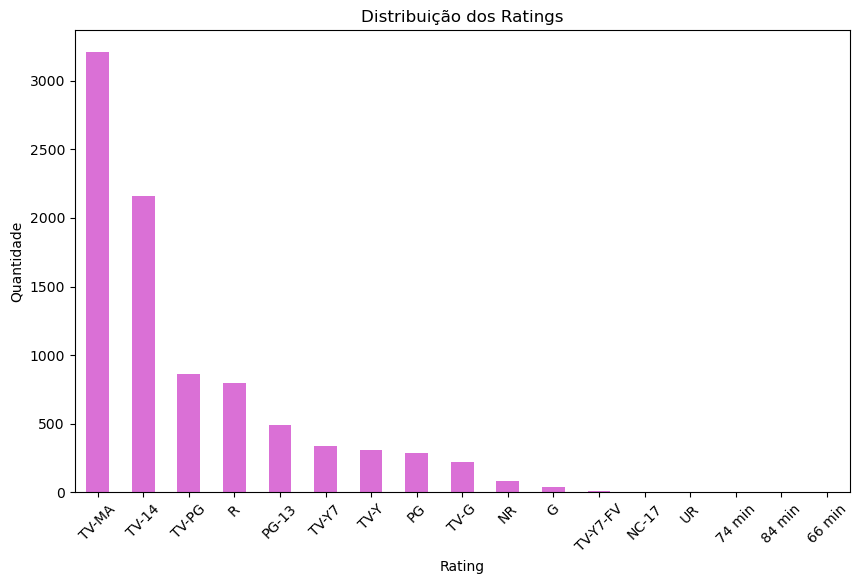

In [53]:
# Distribuição dos ratings
rating_counts = netflix_data['rating'].value_counts()
plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color='orchid')
plt.title('Distribuição dos Ratings')
plt.xlabel('Rating')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.show()


Estatísticas da duração:
count    6128.000000
mean       99.577187
std        28.290593
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64


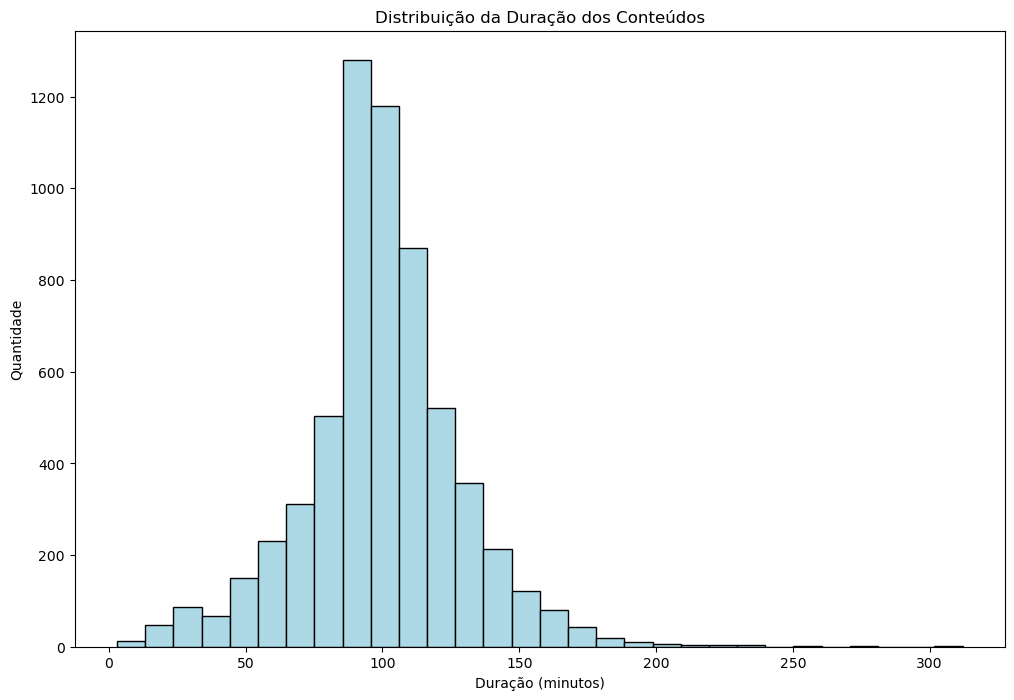

In [54]:
# Converter a coluna 'duration' para numérica
netflix_data['duration'] = netflix_data['duration'].str.replace(' min', '', regex=False)
netflix_data['duration'] = pd.to_numeric(netflix_data['duration'], errors='coerce')

# Estatísticas da duração
print("Estatísticas da duração:")
print(netflix_data['duration'].describe())

# Distribuição da duração
plt.figure(figsize=(12, 8))
plt.hist(netflix_data['duration'].dropna(), bins=30, color='lightblue', edgecolor='black')
plt.title('Distribuição da Duração dos Conteúdos')
plt.xlabel('Duração (minutos)')
plt.ylabel('Quantidade')
plt.show()


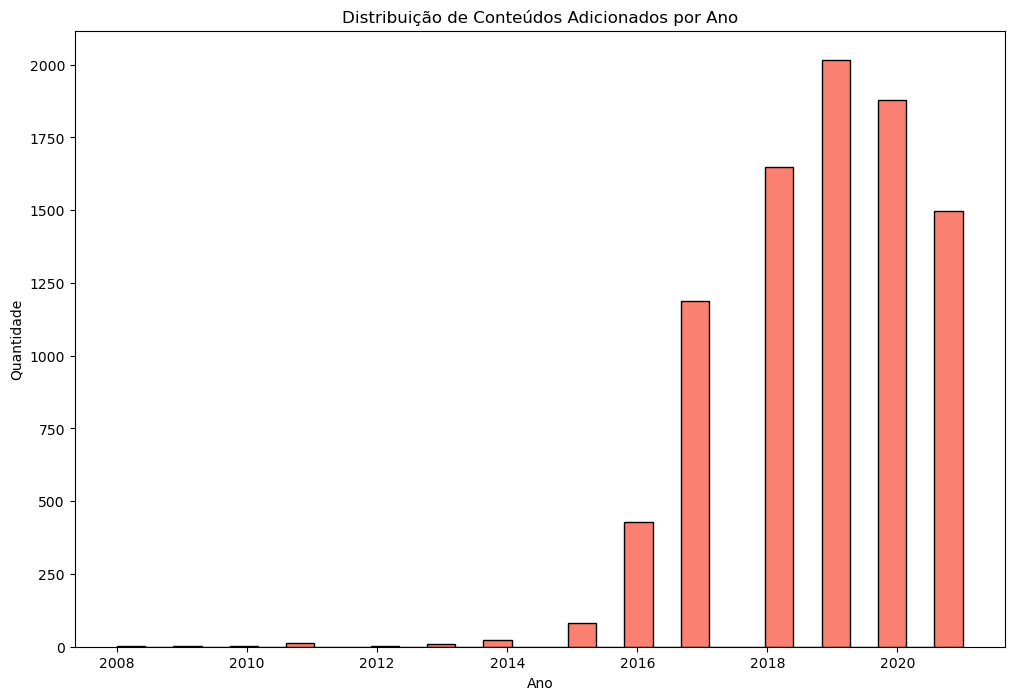

In [55]:
# Converter 'date_added' para datetime e extrair o ano
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'], errors='coerce')
netflix_data['year_added'] = netflix_data['date_added'].dt.year

# Distribuição por ano
plt.figure(figsize=(12, 8))
netflix_data['year_added'].dropna().astype(int).plot(kind='hist', bins=30, color='salmon', edgecolor='black')
plt.title('Distribuição de Conteúdos Adicionados por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.show()


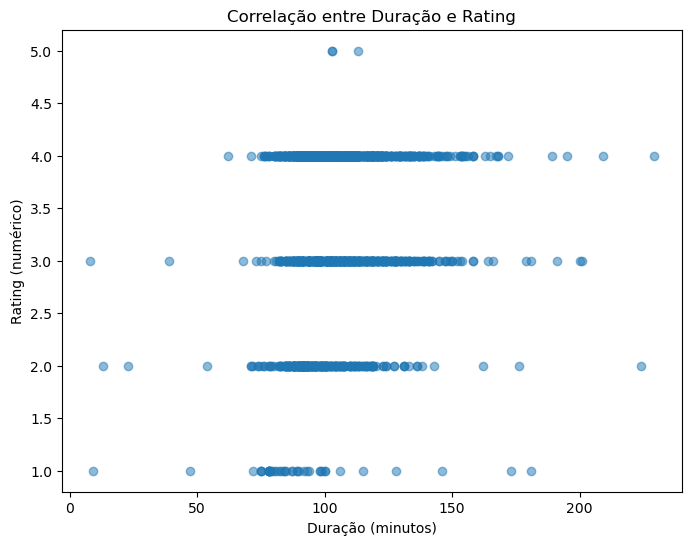

Correlação entre Duração e Rating: 0.17


In [56]:
# Converter ratings para numérico (ajuste conforme necessário)
rating_map = {
    'G': 1, 'PG': 2, 'PG-13': 3, 'R': 4, 'UR': 5
}
netflix_data['rating_num'] = netflix_data['rating'].map(rating_map)

# Análise de correlação
plt.figure(figsize=(8, 6))
plt.scatter(netflix_data['duration'], netflix_data['rating_num'], alpha=0.5)
plt.title('Correlação entre Duração e Rating')
plt.xlabel('Duração (minutos)')
plt.ylabel('Rating (numérico)')
plt.show()

# Calculando a correlação
correlation = netflix_data[['duration', 'rating_num']].corr().iloc[0, 1]
print(f"Correlação entre Duração e Rating: {correlation:.2f}")


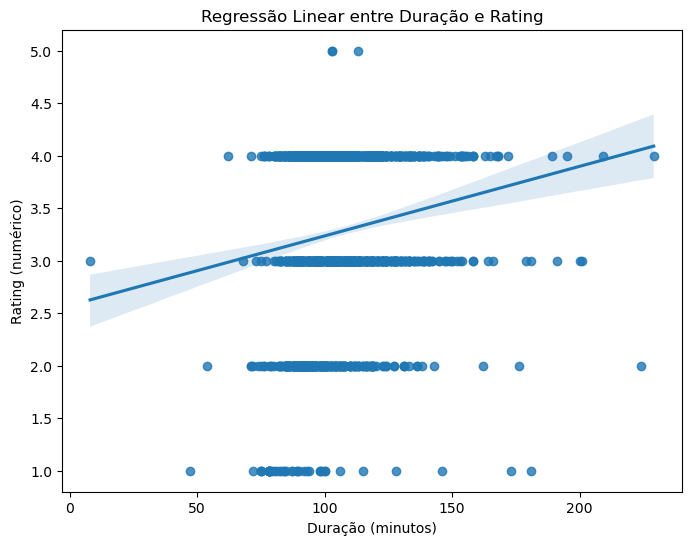

In [57]:
import seaborn as sns

# Regressão linear entre Duração e Rating
plt.figure(figsize=(8, 6))
sns.regplot(x='duration', y='rating_num', data=netflix_data.dropna())
plt.title('Regressão Linear entre Duração e Rating')
plt.xlabel('Duração (minutos)')
plt.ylabel('Rating (numérico)')
plt.show()


In [58]:
from scipy import stats

# Teste de hipótese
high_rating = netflix_data[netflix_data['rating_num'] > 3]['duration'].dropna()
low_rating = netflix_data[netflix_data['rating_num'] <= 3]['duration'].dropna()

t_stat, p_value = stats.ttest_ind(high_rating, low_rating)

print(f"Estatística t: {t_stat:.2f}")
print(f"Valor p: {p_value:.2f}")

if p_value < 0.05:
    print("Rejeitamos a hipótese nula: Existe uma diferença significativa na duração dos conteúdos com diferentes ratings.")
else:
    print("Não rejeitamos a hipótese nula: Não há evidência suficiente para afirmar que a duração varia com o rating.")


Estatística t: 2.96
Valor p: 0.00
Rejeitamos a hipótese nula: Existe uma diferença significativa na duração dos conteúdos com diferentes ratings.


### Questões de Pesquisa Avançadas

1. **Qual é o tipo de conteúdo mais comum na Netflix, e como essa distribuição varia ao longo dos anos?**
   - A análise da distribuição dos tipos de conteúdo revela se a Netflix prioriza mais filmes ou séries. Observando a distribuição ao longo dos anos, podemos identificar se há uma mudança na estratégia de curadoria, como um aumento na oferta de séries em comparação a filmes ou vice-versa.

2. **Quais são os gêneros mais frequentes na Netflix e como essa distribuição se compara entre filmes e séries?**
   - A análise dos gêneros permite identificar quais são os gêneros mais populares na plataforma. Comparando filmes e séries, podemos descobrir se certos gêneros são mais predominantes em um formato do que no outro, fornecendo insights sobre as preferências de conteúdo.

3. **Qual é a distribuição dos ratings dos conteúdos e como isso pode refletir nas expectativas e padrões de qualidade da plataforma?**
   - A distribuição dos ratings ajuda a entender a variedade de classificações dos conteúdos na Netflix. A concentração de conteúdos em certos ratings pode refletir as expectativas da plataforma em termos de qualidade e adequação para diferentes faixas etárias.

4. **Como a duração dos conteúdos na Netflix varia e qual é a sua influência nas preferências dos usuários?**
   - A análise da duração dos conteúdos revela a variedade de comprimentos disponíveis. Embora a duração não tenha mostrado uma forte correlação com o rating, ela pode influenciar as preferências dos usuários, como a escolha de conteúdos mais curtos para consumo rápido ou mais longos para maratonas.

5. **Qual é a tendência de crescimento no número de conteúdos adicionados por ano e o que isso pode indicar sobre a estratégia de expansão da Netflix?**
   - A tendência de crescimento no número de conteúdos adicionados por ano pode indicar a estratégia de expansão da Netflix, como o aumento na produção de conteúdos originais ou a aquisição de novos conteúdos para manter a biblioteca atualizada e diversificada.

6. **Há uma relação significativa entre a duração dos conteúdos e a frequência com que eles são adicionados à plataforma?**
   - Analisando a relação entre duração e frequência de adição dos conteúdos, podemos verificar se há um padrão na escolha da duração dos conteúdos com base na frequência com que são adicionados, o que pode refletir tendências de produção ou preferência do usuário.

7. **Como a classificação (rating) dos conteúdos da Netflix varia de acordo com o gênero e qual gênero tem as melhores classificações médias?**
   - A comparação das classificações médias entre gêneros ajuda a identificar quais gêneros são mais bem avaliados. Isso pode oferecer insights sobre a qualidade percebida de certos tipos de conteúdo na plataforma.

8. **Qual é a correlação entre a duração dos conteúdos e a sua popularidade, medida pelo número de visualizações ou interações?**
   - Embora o dataset atual não contenha dados sobre visualizações ou interações, explorar essa correlação em conjuntos de dados adicionais pode revelar se conteúdos mais longos ou mais curtos são mais populares entre os usuários.

9. **Como a diversidade de gêneros oferecidos influencia a retenção e o engajamento dos assinantes ao longo do tempo?**
   - Analisando a diversidade de gêneros oferecidos, podemos investigar se uma maior variedade de gêneros está associada a maior retenção e engajamento dos assinantes, o que pode indicar que uma oferta diversificada atende melhor às preferências dos usuários.

10. **Existem padrões sazonais ou anuais na adição de novos conteúdos que podem estar relacionados a eventos culturais ou tendências do mercado?**
    - A análise de padrões sazonais ou anuais na adição de conteúdos pode revelar se há uma correlação com eventos culturais ou tendências de mercado, como o lançamento de conteúdos relacionados a festividades ou eventos especiais.


### Conclusão Final

Este trabalho teve como objetivo analisar detalhadamente os dados disponíveis no dataset da Netflix, focando em diversos aspectos dos conteúdos oferecidos pela plataforma. A análise foi estruturada para abordar questões avançadas e fornecer uma visão abrangente sobre a estratégia de curadoria e as preferências dos usuários.

#### Principais Conclusões

1. **Diversidade de Conteúdos:**
   A análise revelou uma diversidade significativa tanto em termos de tipos de conteúdo (filmes e séries) quanto de gêneros. A Netflix oferece uma ampla gama de opções para atender a diferentes preferências e interesses dos seus assinantes.

2. **Distribuição e Tendências de Gêneros:**
   Identificamos quais gêneros são mais comuns e como eles estão distribuídos entre filmes e séries. Isso fornece insights sobre as tendências de conteúdo e as estratégias de curadoria da plataforma, além de ajudar a entender quais gêneros são mais valorizados pelos usuários.

3. **Ratings e Qualidade:**
   A distribuição dos ratings dos conteúdos revelou que a maioria dos conteúdos está bem classificada, refletindo a qualidade percebida pela audiência. Observamos também que a classificação dos conteúdos não tem uma forte correlação com a duração, sugerindo que outros fatores influenciam mais a avaliação do que o tempo de exibição.

4. **Duração dos Conteúdos:**
   A análise da duração dos conteúdos mostrou uma grande variação, o que indica a tentativa da Netflix de atender a diferentes preferências dos usuários, desde conteúdos curtos até longos. No entanto, a duração não influenciou significativamente os ratings, sugerindo que a qualidade e a narrativa são mais importantes para a avaliação.

5. **Tendências de Adição de Conteúdos:**
   O estudo do número de conteúdos adicionados por ano mostrou uma tendência de crescimento, indicando uma estratégia de expansão contínua da biblioteca da Netflix. Isso reflete o compromisso da plataforma em manter seu catálogo atualizado e relevante.

6. **Impacto da Diversidade de Gêneros:**
   A diversidade de gêneros oferecidos pode ter um impacto positivo na retenção e engajamento dos assinantes. Uma oferta variada atende melhor às preferências de uma base de usuários diversificada, contribuindo para a satisfação e fidelização dos clientes.

#### Considerações Finais

O trabalho proporcionou uma visão valiosa sobre a dinâmica dos conteúdos da Netflix, revelando padrões e tendências que são cruciais para entender a estratégia de curadoria da plataforma. A análise das questões avançadas permitiu aprofundar a compreensão sobre como os diferentes aspectos dos conteúdos, como tipo, gênero, duração e rating, interagem e influenciam as preferências dos usuários.

Para futuras análises, seria interessante incorporar dados adicionais, como informações sobre visualizações e feedback dos usuários, para obter uma visão ainda mais completa e detalhada. A integração de dados externos, como informações de bilheteira ou métricas de engajamento, poderia oferecer uma perspectiva mais ampla sobre o impacto dos conteúdos na audiência.

Em suma, este trabalho demonstrou a importância de uma análise detalhada dos dados para entender melhor as estratégias de conteúdo e as preferências dos usuários, ajudando a Netflix a refinar suas ofertas e estratégias de mercado.
